<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 22.9MB/s]


In [ ]:
!unzip /content/insurance.zip

Archive:  /content/insurance.zip
  inflating: insurance.csv           


In [ ]:
dataset = pd.read_csv("/content/insurance.csv")

In [ ]:
dataset.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'],
      dtype=object)

In [ ]:
Y = dataset[['charges']]

In [ ]:
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1}).fillna(-1)
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1}).fillna(-1)
dataset['region'] = dataset['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}).fillna(-1)


In [ ]:
X = dataset.drop(['charges'], axis=1)

# Data Analysis

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 62.8 KB


In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


In [ ]:
Y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
X.describe()

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.515695
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


In [ ]:
Y.describe()

,charges
count,1338.000000
mean,13270.422265
std,12110.011237
min,1121.873900
25%,4740.287150
50%,9382.033000
75%,16639.912515
max,63770.428010


In [ ]:
dataset_correlation = dataset.drop(['charges'] , axis=1)

In [ ]:
dataset_correlation.corr(method='pearson')

,age,sex,bmi,children,smoker,region
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000


<Axes: >

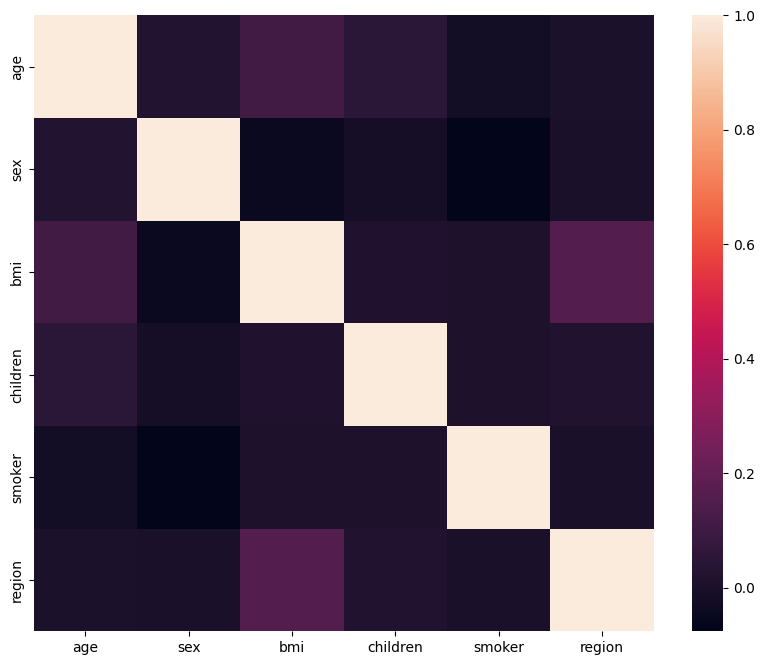

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset_correlation.corr())

# Feature Normalization

In [ ]:
x = X.values
y = Y.values

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [ ]:
x

array([[0.02173913, 1.        , 0.3212268 , 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.47914985, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 0.        , 0.45843422, 0.6       , 0.        ,
        0.66666667],
       ...,
       [0.        , 1.        , 0.56201238, 0.        , 0.        ,
        0.66666667],
       [0.06521739, 1.        , 0.26472962, 0.        , 0.        ,
        1.        ],
       [0.93478261, 1.        , 0.35270379, 0.        , 1.        ,
        0.33333333]])

In [ ]:
y

array([[0.25161076],
       [0.00963595],
       [0.05311516],
       ...,
       [0.00810808],
       [0.01414352],
       [0.44724873]])

# Training Linear Regression Model

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)
y_hat = model.predict(x)

In [ ]:
model.score(x,y)

0.7507372027994939

In [ ]:
model.coef_

array([[ 0.188915  ,  0.00209279,  0.19731711,  0.03825862,  0.38022321,
        -0.01693447]])

In [ ]:
model.intercept_

array([-0.04995218])